<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Blue_Car_Hypothesis_Testing/blob/master/Precy_Mae_Core_W4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Core W4 Independent Project**

## *1.* Defining the Question

**Overview**

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

To work on this project, we will perform the following analysis with Python; 

1. Find and deal with outliers, anomalies, and missing data 
within the dataset.
2. Plot appropriate univariate and bivariate summaries recording our observations.
3. Implement the solution by performing hypothesis testing.
4. This will need to be documented when writing the report.

**Dataset** 

* Variable Definitions: http://bit.ly/DSCoreAutolibDatasetGlossary 
* Dataset: http://bit.ly/DSCoreAutolibDataset

**Report**
* https://docs.google.com/document/d/1-kyY5-DWjmdbFtbbKjQgwuPCylBfF3aplAQGWlr6TdY/edit

### a) Specifying the Question

>  The Data Scientist for the Autolib electric car-sharing service company are interested to test if there is a difference between the number of blue cars taken on weekdays from postal code 75011 and postal code 75015



 > 



### b) Defining the Metric for Success
 

> * Getting an accurate solution to our hypothesis





### c) Understanding the context


### d) Recording the Experimental Design

















### e) Data Relevance


## *2.* Reading the Data


In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [100]:
# Read autolib description dataset
df_description= pd.read_csv("http://bit.ly/DSCoreAutolibDatasetGlossary",encoding='latin-1',error_bad_lines=False)
# Read autolib dataset
df= pd.read_csv("http://bit.ly/DSCoreAutolibDataset", error_bad_lines= False,index_col= None, )
df

b'Skipping line 6: expected 2 fields, saw 3\nSkipping line 34: expected 2 fields, saw 3\nSkipping line 38: expected 2 fields, saw 3\n'


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## *3.* Check the data


In [101]:
# Determining the no. of records in our description dataset
#
df_description.shape

(61, 2)

In [102]:
# Determining the no. of records in our dataset
#
df.shape

(16085, 13)

In [103]:
# Preview dataset columns
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [104]:
# Previewing the top of our autolib  dataset
#
df.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [105]:
# Previewing the bottom of our dataset
#
df.tail(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [41]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [106]:
# Taking a look at our statistical summaries
#
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## *4.* External Source Validation

>Our measurements are in line with what has been recorded. We got our external source validation and confirmed our dataset from Autolib Car sharing company.


## *5.* Tidying the Dataset


Tidying column names

In [107]:
# Data cleaning procedures, fixing column names to lower case
#
df.columns= df.columns.str.strip().str.lower().str.replace(' ','_')
df.head(2)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


In [108]:
# Review column names to ensure proper naming
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [109]:
# Renaming our columns from day0fweek to day_of_week
df.rename(columns={'dayofweek':'day_of_week','n_daily_data_points':'daily_data_points'}, inplace= True)

In [110]:
# checking column data types
df.dtypes
# There is no need to change the data types

postal_code                int64
date                      object
daily_data_points          int64
day_of_week                int64
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

Dealing with missing values

In [111]:
# Identifying the Missing Data
df.isnull().sum()
# our dataset has no missing data

postal_code               0
date                      0
daily_data_points         0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

Checking for consistency and Uniformity

In [112]:
# Checking for unique values per column
for column in df.columns:
  print('\n')
  print(df[column].nunique())
  print(df[column].unique())
  # my categorical columns do not have anomalies



104
[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


156
['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018

In [113]:
# Picking columns relevant to our research
df1 = df[['postal_code','day_type','bluecars_taken_sum','bluecars_returned_sum']]
df1.head(3)

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,weekday,110,103
1,75001,weekday,98,94
2,75001,weekday,138,139


Checking for outliers

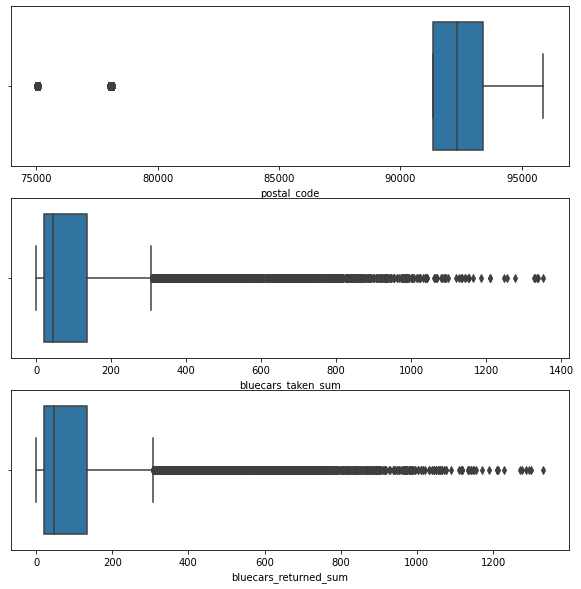

In [114]:
# Checking for outliers
fig, ((ax1),(ax2),(ax3)) = plt.subplots(3 ,figsize=(10, 10))
#fig.suptitle('Boxplots')
print('\n')
sns.boxplot(df1['postal_code'], ax=ax1)
sns.boxplot(df1['bluecars_taken_sum'], ax=ax2)
sns.boxplot(df1['bluecars_returned_sum'], ax=ax3)
plt.show()

* **Postal Code,** has two extreeme outliers which can be explained by the postal code allocation. The data is skewed to the right and a few outliers on the left.
* **Blue cars taken,** has many outliers explained by how the dataset skewed to the right.
* **Blue cars received,** also has many outliers explained by how our dataset is skewed to the right

In [117]:
# Creating a copy of df1 in order to log transform df1 without affecting df1 dataframe
df2= df1.copy()
df2.head(2)

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,weekday,110,103
1,75001,weekday,98,94


In [123]:
# Dealing with outliers without deleting them using log transformation. I chose log transformation since it is best suited for positively skewed data.
df2['log_blue_cars_returned_sum']= np.log(df2.bluecars_returned_sum)
df2['log_blue_cars_taken_sum']= np.log(df2.bluecars_taken_sum)


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


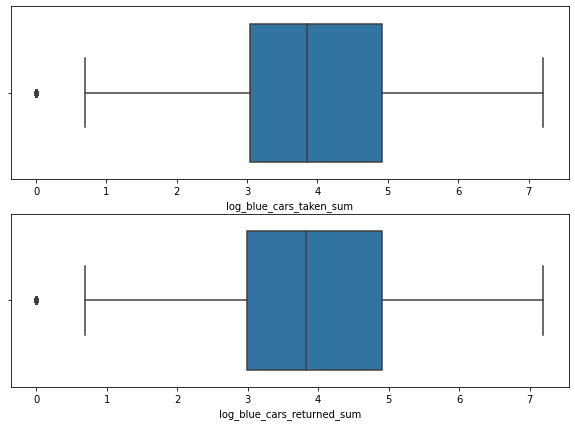

In [122]:
# Confirming that our data has been transformed
fig, ((ax1),(ax2)) = plt.subplots(2 ,figsize=(10, 7))
sns.boxplot(df2['log_blue_cars_taken_sum'], ax=ax1)
sns.boxplot(df2['log_blue_cars_returned_sum'], ax=ax2)
plt.show()

## *6.* Exploratory Analysis




### Univariate analysis

In [124]:
# Lets import pandas profiling to help us with our univariate analysis
!pip install pandas-profiling -U

     |████████████████████████████████| 266kB 5.5MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 604kB 14.5MB/s 
     |████████████████████████████████| 3.1MB 29.9MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 296kB 47.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=eff34a68de8489f3d07a904c2b00f7c5ea8472f502d97e388bac835c36ebcc02
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=0cefbb17fc20115cb016aa8d964fe4e39ab36c3ac7b424ae3f4e51bed3dfa239
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    U

In [125]:
# Lets import the pandas profiling report
from pandas_profiling import ProfileReport

 The histograms above show

In [127]:
# Displaying our profile report for df1 dataset
df1_report= ProfileReport(df1)
df1_report

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Bivariate analysis

In [ ]:
autolib.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


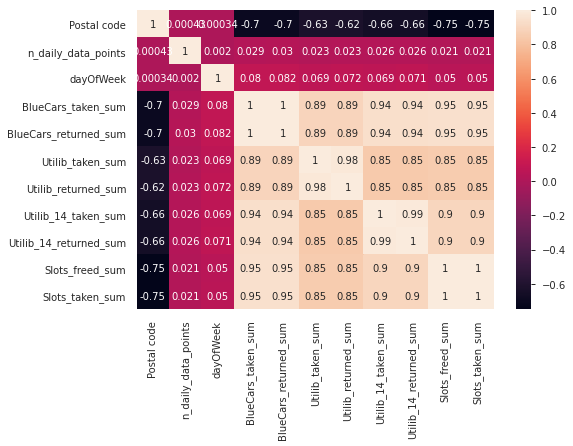

In [ ]:
sns.heatmap(autolib.corr(),annot=True)
plt.show()
# we don’t see any attributes to be correlated and 
#the diagonal elements of the matrix value are always 1 as we are finding the correlation between the same columns 
#thus the inference here is
# There are no correlated variables this means that all the numerical attributes are important and needs to be considered for building the model

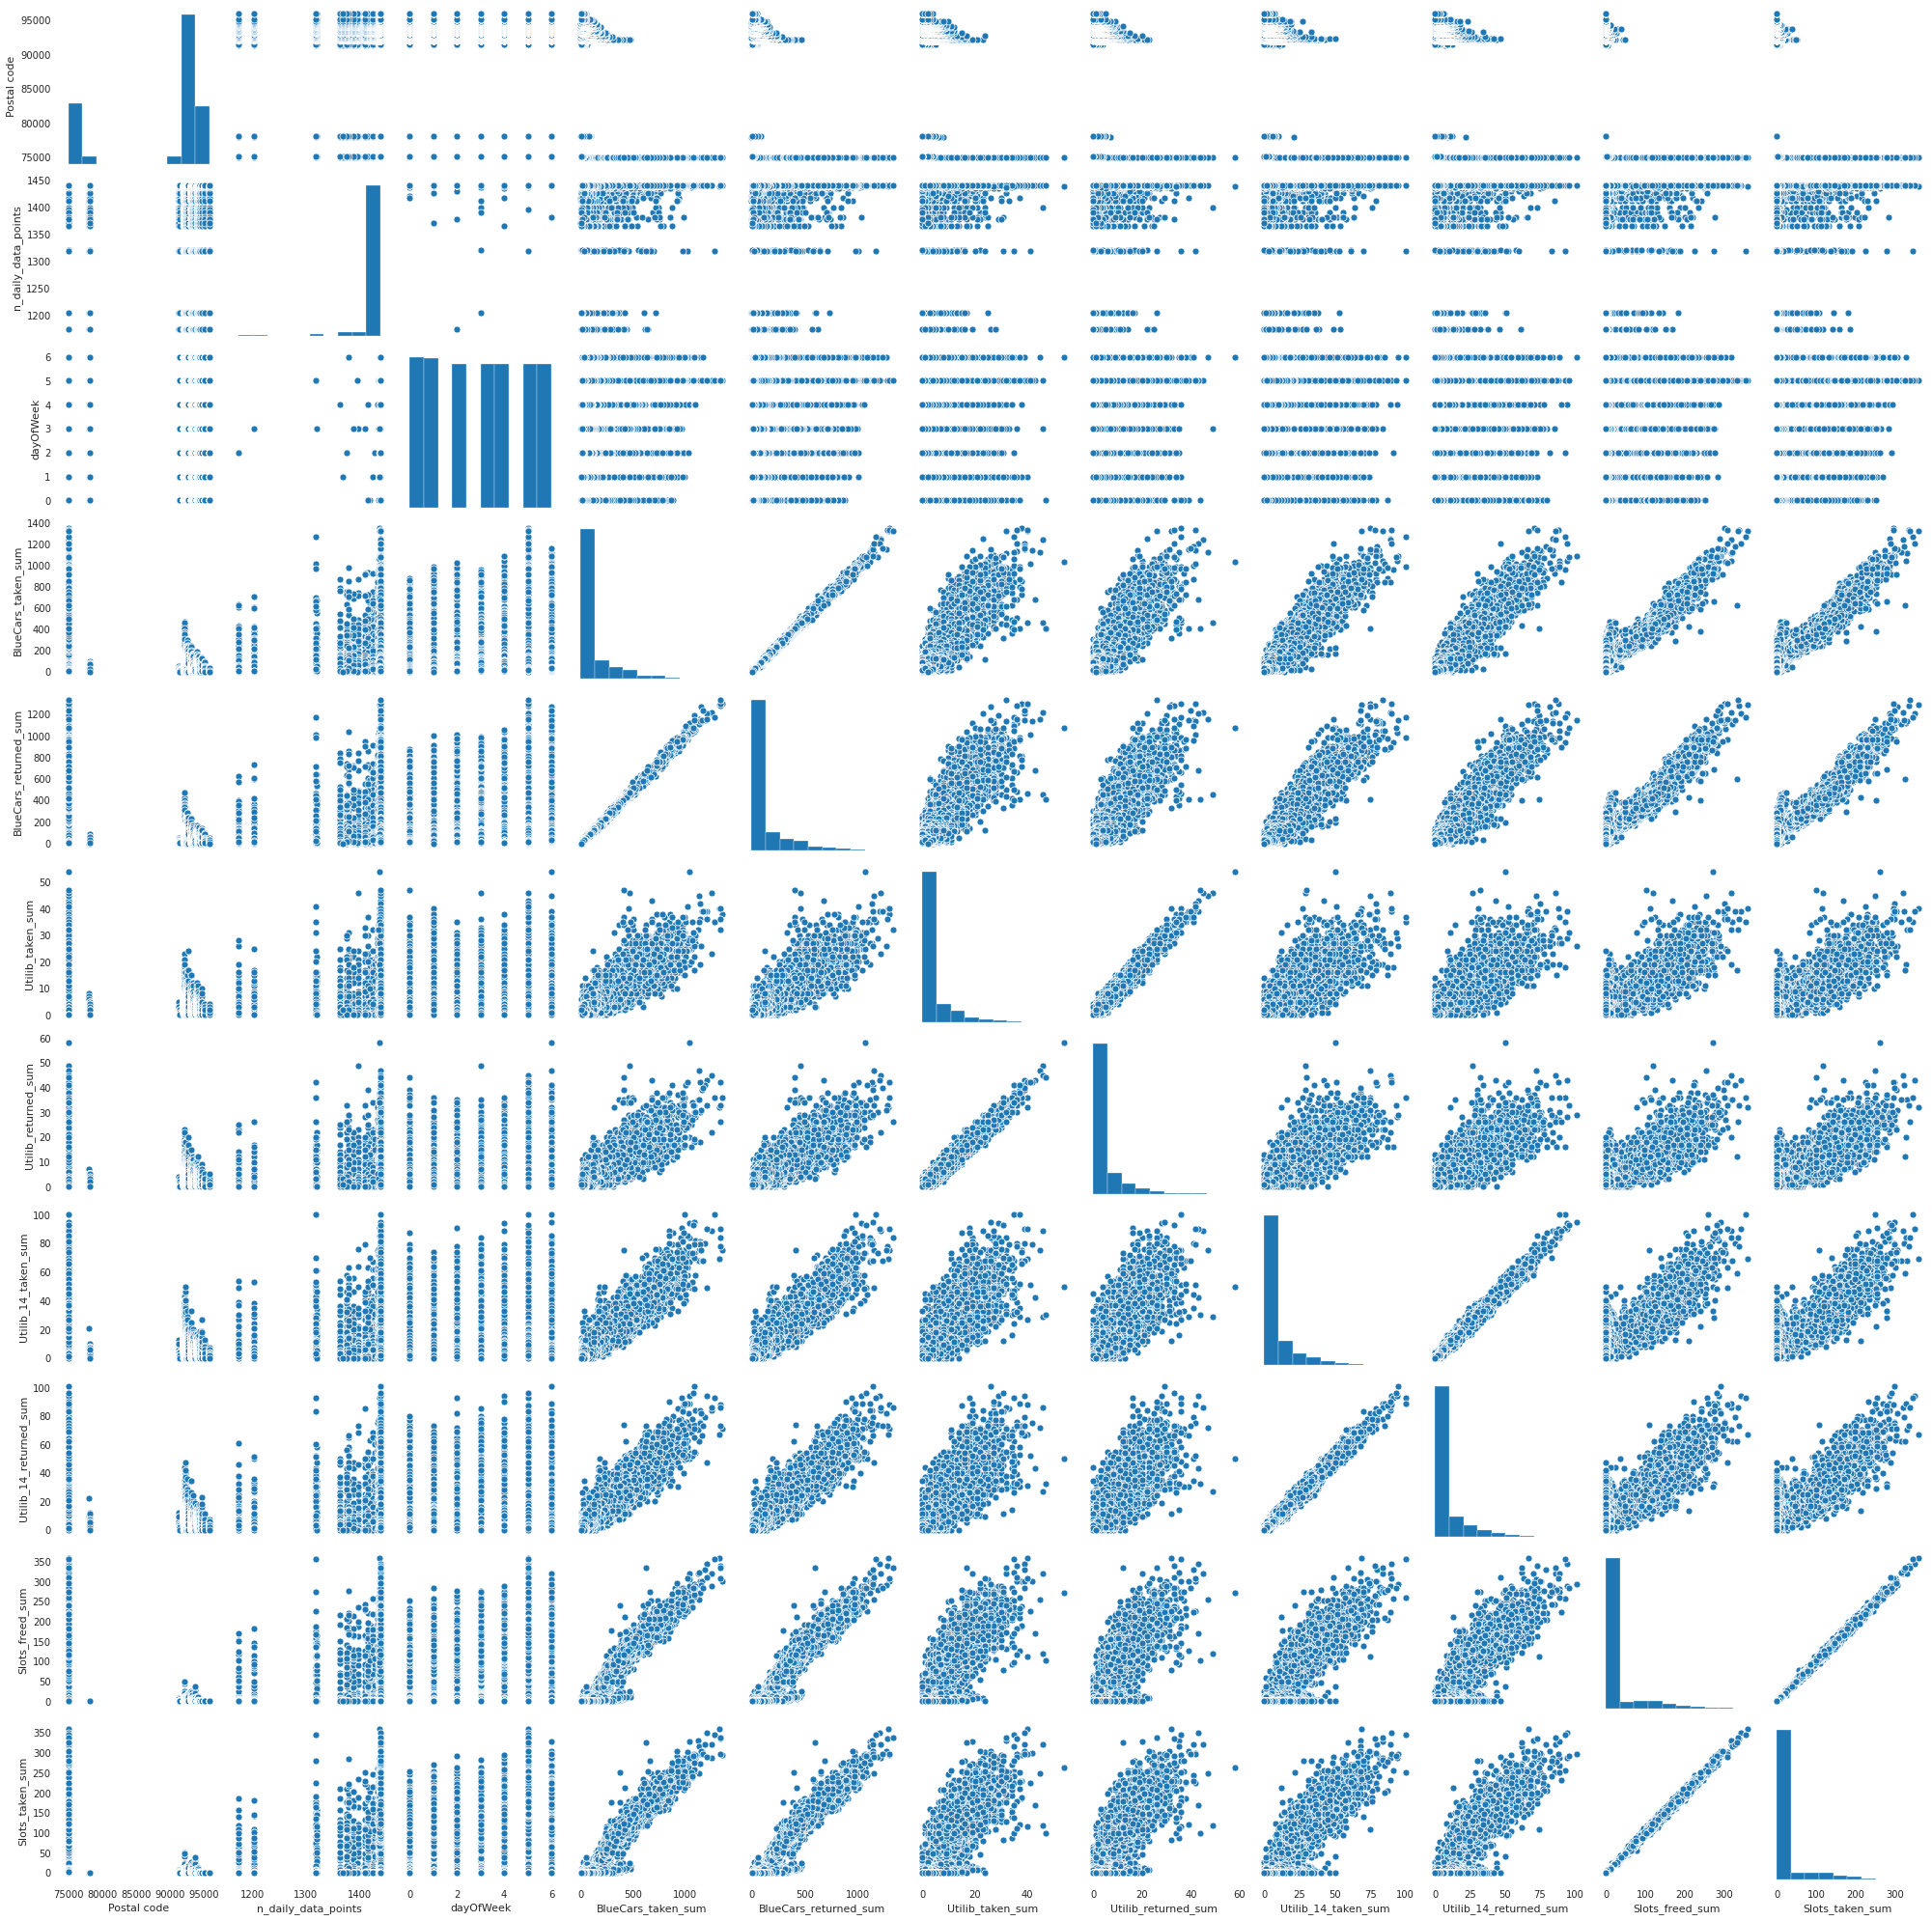

In [ ]:
sns.pairplot(autolib)

## *7.* Implementing the solution 

> Hypothesis testing



In [ ]:
autolib.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
autolib.shape

(16085, 13)

In [ ]:
autolib['utilib_taken_sum'].mean()

3.69829033260802

In [ ]:
autolib_taken_list = autolib['Utilib_taken_sum'].tolist()
autolib_taken_list

[3,
 1,
 0,
 2,
 3,
 6,
 2,
 3,
 1,
 5,
 3,
 3,
 2,
 2,
 4,
 1,
 2,
 7,
 3,
 2,
 4,
 2,
 3,
 7,
 0,
 0,
 1,
 5,
 2,
 2,
 2,
 4,
 3,
 4,
 2,
 2,
 4,
 8,
 5,
 5,
 5,
 7,
 1,
 6,
 2,
 3,
 0,
 4,
 1,
 1,
 3,
 1,
 4,
 3,
 0,
 0,
 6,
 9,
 1,
 4,
 1,
 2,
 2,
 3,
 4,
 5,
 3,
 6,
 2,
 5,
 1,
 3,
 2,
 6,
 3,
 3,
 3,
 9,
 2,
 11,
 3,
 0,
 4,
 4,
 4,
 6,
 3,
 2,
 4,
 2,
 6,
 1,
 6,
 8,
 1,
 1,
 2,
 5,
 8,
 3,
 5,
 2,
 4,
 6,
 2,
 3,
 4,
 8,
 9,
 2,
 0,
 2,
 3,
 4,
 11,
 1,
 4,
 2,
 1,
 2,
 0,
 7,
 2,
 5,
 0,
 4,
 7,
 4,
 2,
 4,
 9,
 5,
 3,
 5,
 4,
 17,
 4,
 2,
 7,
 9,
 1,
 3,
 5,
 6,
 4,
 8,
 4,
 1,
 4,
 5,
 4,
 5,
 7,
 7,
 6,
 0,
 4,
 6,
 3,
 6,
 2,
 5,
 4,
 5,
 9,
 1,
 5,
 2,
 3,
 1,
 3,
 4,
 4,
 10,
 5,
 3,
 9,
 5,
 6,
 5,
 9,
 10,
 8,
 6,
 3,
 6,
 4,
 3,
 7,
 6,
 2,
 0,
 2,
 2,
 3,
 5,
 4,
 13,
 2,
 6,
 7,
 1,
 6,
 2,
 3,
 4,
 9,
 3,
 8,
 6,
 0,
 3,
 4,
 8,
 10,
 2,
 4,
 6,
 6,
 4,
 3,
 5,
 9,
 2,
 1,
 1,
 2,
 4,
 10,
 8,
 10,
 2,
 3,
 3,
 2,
 2,
 1,
 3,
 6,
 9,
 0,
 4,
 9,
 5,
 5,
 4,
 7,
 9,

In [ ]:
sample_size= 1000
sample=np.random.choice(autolib_taken_list,sample_size)
sample

array([ 0, 25,  0,  5,  0,  0,  6,  0,  1,  4,  1,  5,  2, 13,  5,  0,  4,
       17,  2,  5, 12,  0,  0,  1,  1,  0,  1,  3,  2,  1,  7, 10,  5, 12,
       12,  1,  0,  0,  5,  0, 20,  9,  1,  0,  3,  4, 10,  0,  0,  0, 18,
        0,  0,  4,  0,  0,  0,  0,  0,  2, 17,  0,  2,  4,  0,  2,  2,  1,
        3,  4,  0,  1,  0,  0,  0,  3,  2,  0,  0,  0, 12, 13,  0,  0,  0,
        0,  1,  3,  3,  1, 12,  1,  9,  0,  0,  0,  0,  5,  0,  1,  5,  6,
        1,  8,  1,  2,  0,  1,  5,  0,  0,  0,  0,  2,  3,  0,  1,  4,  0,
        7,  0,  0,  0,  2,  1,  9,  6, 18,  6,  0, 27,  1,  1,  7,  2,  1,
        6,  0,  0,  0,  2,  1,  5, 20,  4,  0,  2,  2,  1,  0,  2,  6,  3,
        4, 21,  2,  4, 18,  0,  0,  3,  7,  1,  6,  2,  1,  0, 10,  3,  4,
       14,  0,  1,  0,  0,  1,  1,  1,  0,  1,  0,  3,  2,  0,  6, 11, 15,
        2,  1,  0,  0, 25,  9,  2,  1,  2,  1, 10,  6,  4,  0,  0,  9, 17,
        6, 14, 11,  5,  2,  1,  0,  2,  4,  1,  1,  0,  0,  1,  5,  0,  0,
        3,  0, 21,  0,  3

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
ttest, p_value= ttest_1samp(sample,4)

In [ ]:
#print(p_value)

In [ ]:
#if p_value< 0.05:
#  print("we reject null hypothesis")
#else:
#  print("We do not reject null hypothesis")  

We do not reject null hypothesis


##*better* solution

In [ ]:
# what are the number of blue cars taken on weekdays from 75011
postal_75011=autolib_sample.loc[autolib_sample['Postal code'] == 75011]
postal_75011
#
postal_75011['BlueCars_taken_sum'].sum()

5257

In [ ]:
# 
# selecting sample
autolib_sample= autolib.sample(n= 1000,replace=False)
autolib_sample

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2393,75016,2/23/2018,1440,4,weekday,764,787,18,22,60,61,181,186
6690,92240,6/5/2018,1439,1,weekday,92,100,2,2,6,10,0,0
1584,75011,1/25/2018,1398,3,weekday,418,431,24,23,22,24,110,117
15226,94500,3/22/2018,1440,3,weekday,22,24,0,1,1,3,0,0
7323,92290,6/14/2018,1439,3,weekday,15,13,0,0,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13432,94110,6/18/2018,1440,0,weekday,30,34,1,1,0,2,0,0
7275,92290,4/16/2018,1440,0,weekday,9,13,1,1,0,1,0,0
15961,95880,2/2/2018,1440,4,weekday,17,15,0,0,2,1,0,0
1518,75010,4/28/2018,1440,5,weekend,321,352,6,9,30,32,89,99


In [ ]:
autolib_sample.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,89198.423000,1430.2450,2.935000,118.303000,118.623000,3.501000,3.481000,8.229000,8.177000,20.330000,20.408000
std,7405.252925,38.0399,2.022094,182.248549,182.332444,5.636468,5.608127,12.941408,12.991399,49.841783,50.087426
min,75001.000000,1174.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91400.000000,1439.0000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92360.000000,1440.0000,3.000000,44.000000,44.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93500.000000,1440.0000,5.000000,118.000000,118.000000,4.000000,4.000000,9.000000,9.000000,4.000000,4.000000
max,95880.000000,1440.0000,6.000000,1327.000000,1287.000000,45.000000,47.000000,89.000000,90.000000,360.000000,359.000000


In [ ]:
# Select from our sample data with postal code 75015
sample_75015 =autolib_sample.loc[autolib_sample['Postal code'] == 75015]
sample_75015

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2289,75015,4/19/2018,1203,3,weekday,712,736,17,14,53,50,183,181
2229,75015,2/15/2018,1437,3,weekday,872,862,21,24,66,68,263,260
2262,75015,3/23/2018,1440,4,weekday,946,972,23,24,58,57,251,253
2205,75015,1/22/2018,1440,0,weekday,751,791,18,21,37,38,201,211
2217,75015,2/3/2018,1438,5,weekend,1327,1287,40,32,69,67,360,359
2258,75015,3/19/2018,1440,0,weekday,746,780,27,25,58,53,221,230
2213,75015,1/30/2018,1440,1,weekday,732,746,15,15,48,52,220,226
2287,75015,4/17/2018,1440,1,weekday,774,763,14,12,55,55,192,193
2236,75015,2/22/2018,1440,3,weekday,765,756,22,22,52,60,209,214
2204,75015,1/21/2018,1440,6,weekend,1132,1149,45,47,75,72,254,249


In [ ]:
# we select we specify our data to weekdays
interested_sample=sample_75015[sample_75015['day_type'].str.contains("weekday")]
interested_sample

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2289,75015,4/19/2018,1203,3,weekday,712,736,17,14,53,50,183,181
2229,75015,2/15/2018,1437,3,weekday,872,862,21,24,66,68,263,260
2262,75015,3/23/2018,1440,4,weekday,946,972,23,24,58,57,251,253
2205,75015,1/22/2018,1440,0,weekday,751,791,18,21,37,38,201,211
2258,75015,3/19/2018,1440,0,weekday,746,780,27,25,58,53,221,230
2213,75015,1/30/2018,1440,1,weekday,732,746,15,15,48,52,220,226
2287,75015,4/17/2018,1440,1,weekday,774,763,14,12,55,55,192,193
2236,75015,2/22/2018,1440,3,weekday,765,756,22,22,52,60,209,214


In [ ]:
bluecar_taken_list = interested_sample['BlueCars_taken_sum'].tolist()
bluecar_taken_list

[712, 872, 946, 751, 746, 732, 774, 765]

In [ ]:
meanz=interested_sample['BlueCars_taken_sum'].mean()

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
# population average
pop_av= 126
# sample av
sample_av=118
# sample size
n = 1000

# standard deviation of population
std_sample = 182
# finish t- calculation
t= (sample_av-pop_av)/(std_sample/n**(1/2))
# t-statistic
t

-1.390012158315771

In [ ]:
# degrees of freedom
df = n - 1

from scipy import stats
# calculate the critical value
# alpha is our confidence level
alpha = 0.025

# ppf is percent point function
t_critical_value = round(stats.t.ppf(q=alpha, df=df), 5)
t_critical_value


-1.96234

In [ ]:
from scipy.stats import norm
# calculate the p-value
p = stats.norm.cdf(t_critical_value)
p

0.02486145658322001

In [ ]:
if p<= 0.05:
  print("we reject null hypothesis")
else:
  print("We do not reject null hypothesis") 

we reject null hypothesis


In [ ]:
#ttest, p_value= ttest_1samp(bluecar_taken_list,5257)

In [ ]:
#print(p_value)

1.070870419728286e-13


In [ ]:
#if p_value< 0.05:
#  print("we reject null hypothesis")
#else:
#  print("We do not reject null hypothesis") 

we reject null hypothesis


**Conclusion**

* We will reject the null hypothesis in favour of the alternative hypothesis.
* The difference between the number of blue cars taken on
weekdays from area code 75011 and area 75015 is statistically significant with a p-value of 0.05 and below my alpha of 0.025.
* Therefore, we conclude that our study supports the alternative hypothesis that there is a difference 
between the number of blue cars taken on weekdays from area code 75011 and area 75015.

## *9.*Follow up Questions

### a). Did we have the right data?

> Our data was right but incomplete because we did not have variables reflecting the number of accounts per lets say household



### b). Do we need other data to answer our question?

> We will need other data to properly answer my question. Data that shows the number of accounts per household

###c). Did we have the right question?

> The research question is right but we would need more data to effectively answer it